# Ad CTR Optimization using Upper Confidence Bound (UCB)

**Scenario**: We receive a dataset with users in the rows and ads in the columns. A `1` denotes that the user clicked on that particular and `0` denotes otherwise.

**Goal**: Find the ad with the highest clickthrough rate (CTR).

**Results**: Over 10,000 rounds, the 5th ad or ad at index 4 was found to have the highest clickthrough rate. This result remains unchanged when decreasing the number of rounds to 1,000. However, the results change at 500 rounds where the 8th ad presented itself to have the higher clickthrough rate but only slightly over the 5th ad. Therefore, for plausible results, we determine with a mininum of 1,000 rounds, the 5th ad had the highest frequency of clicks.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import warnings

warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [3]:
N = 10000 # number of rounds
d = 10 # number of ads
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    
    for i in range(0, d):
        
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

## Visualizing the results

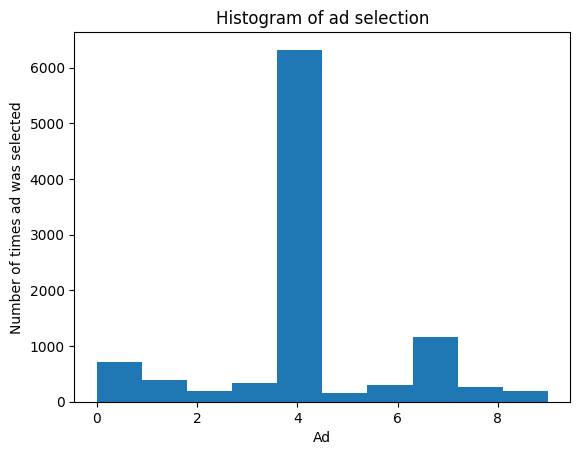

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of ad selection")
plt.xlabel("Ad")
plt.ylabel("Number of times ad was selected")
plt.show()